In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from scipy.stats import *
from sklearn.metrics import mean_squared_error as msq
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Выборка 
sample = norm.rvs(size=100)

In [15]:
# Байесовская оценка (сопряженное распределение - нормальное)
def bayes(i, x1, x2):
    return (sum(sample[:i]) + (x1 * 1.0 /x2**2)) / (i + (1.0 / x2**2))

In [22]:
# Оценка максимального правдоподобия
arr = []
for i in range(1, 100):
    arr += [np.abs(sample[:i].mean())]

# Байесовские оценки
arr1 = []
for i in range(1, 100):
    arr1 += [np.abs(bayes(i, 0, 1))]
    
arr2 = []
for i in range(1, 100):
    arr2 += [np.abs(bayes(i, 0, 100))]
    
arr3 = []
for i in range(1, 100):
    arr3 += [np.abs(bayes(i, 10, 1))]
    
arr4 = []
for i in range(1, 100):
    arr4 += [np.abs(bayes(i, 10, 100))]

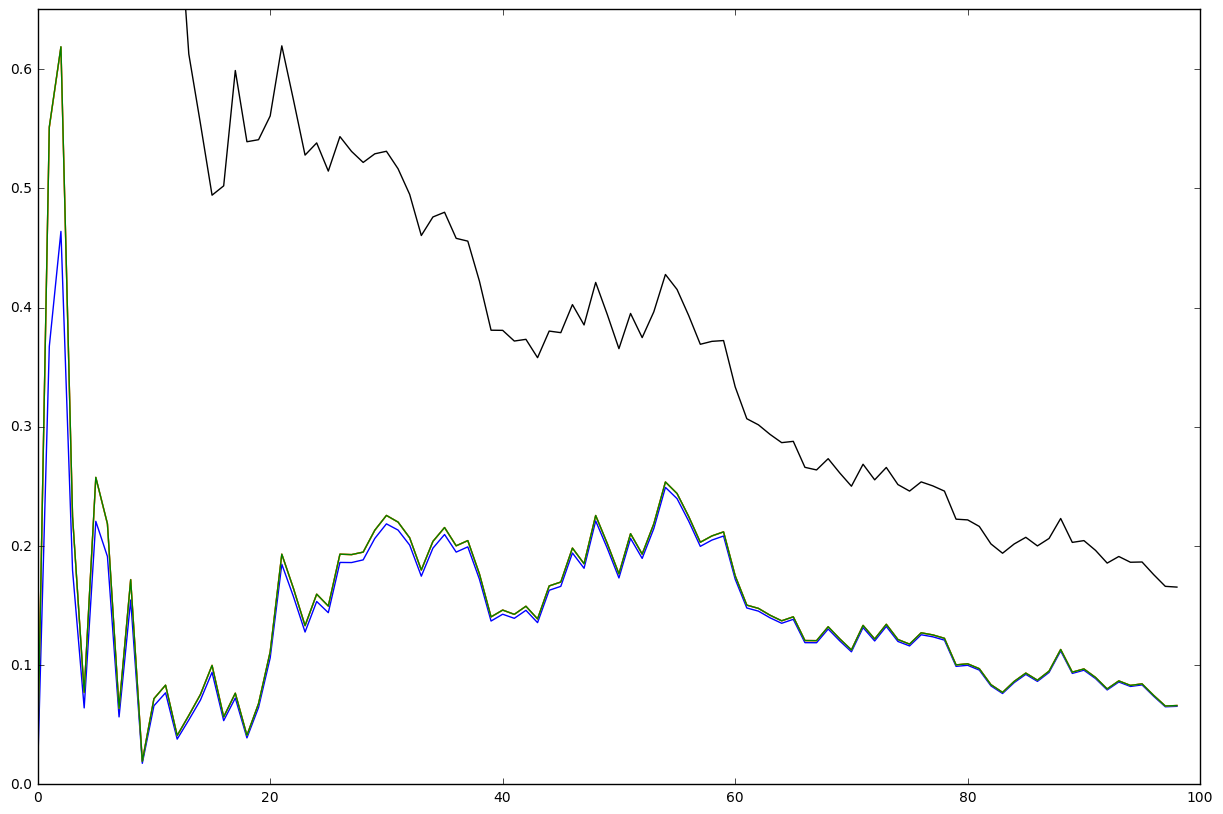

In [31]:
plt.figure(figsize=(15,10))
plt.ylim(0,0.65)
plt.plot(range(99), arr, color='r')
plt.plot(range(99), arr1, color='b')
plt.plot(range(99), arr2, color='orange')
plt.plot(range(99), arr3, color='black')
plt.plot(range(99), arr4, color='g')

plt.show()

# Вывод
Лучше всего себя показали оценка максимального правдоподобия и байесовская оценка с параметрами (1, 1) 

In [32]:
def bayes1(i, x1, x2):
    return (sum(sample[:i]**2.0) + 2.0*x2) / (i + 2*x1 -2)

In [42]:
# Оценка максимального правдоподобия
arr = []
for i in range(1, 100):
    arr += [np.abs(sample[:i].var())]

# Байесовские оценки
arr1 = []
for i in range(1, 100):
    arr1 += [np.abs(bayes1(i, 1, 1) - 1)]
    
arr2 = []
for i in range(1, 100):
    arr2 += [np.abs(bayes1(i, 1, 100) - 1)]
    
arr3 = []
for i in range(1, 100):
    arr3 += [np.abs(bayes1(i, 10, 1) - 1)]
    
arr4 = []
for i in range(1, 100):
    arr4 += [np.abs(bayes1(i, 10, 100) - 1)]

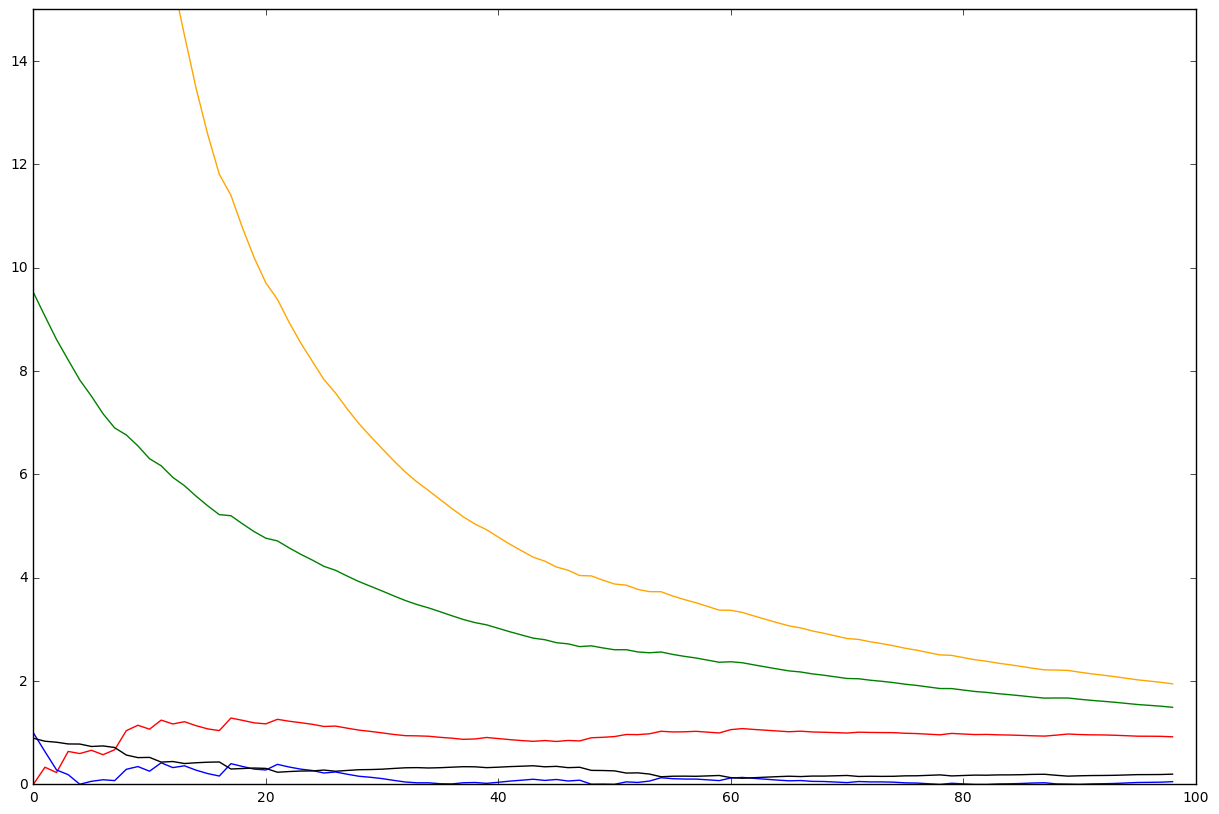

In [43]:
plt.figure(figsize=(15,10))
plt.ylim(0,15)
plt.plot(range(99), arr, color='r')
plt.plot(range(99), arr1, color='b')
plt.plot(range(99), arr2, color='orange')
plt.plot(range(99), arr3, color='black')
plt.plot(range(99), arr4, color='g')

plt.show()

# Вывод
Лучше всего себя показали байесовские оценки с параметрами (1, 1) и (10, 1)